## Input to Chempy
*Chempy* was developed with the intention to flexibly test all the assumptions going into chemical evolution modeling. Here we give a range of input parameters that can be played around with in *Chempy*

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from Chempy.parameter import ModelParameters
a = ModelParameters()

## Star formation rate (SFR)
Determines how many stars a formed at a specific time of the simulation

In [3]:
# We load the SFR class

from Chempy.sfr import SFR


# Its initialised with t_0, t_end, and number of time-steps

basic_sfr = SFR(0,13.5,136)


# Then we load it with its default parameters

getattr(basic_sfr, a.basic_sfr_name)(S0 = a.S_0 * a.mass_factor,a_parameter = a.a_parameter, loc = a.sfr_beginning, scale = a.sfr_scale)

these SFR functions are already implemented, see source/sfr.py
['model_A', 'gamma_function', 'prescribed', 'doubly_peaked']
the sfr sums to 1
1.0
1.0
1.0


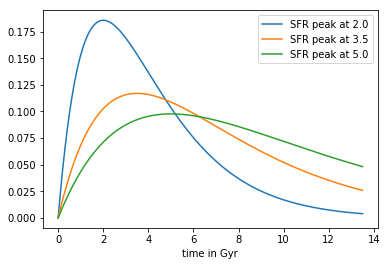

In [4]:
# Here a list of already implemented SFR functions

print('these SFR functions are already implemented, see source/sfr.py')
print(a.basic_sfr_name_list)


# The SFR should always sum to 1 if you want to make your own SFR function

print('the sfr sums to 1')


# Plot the default SFR function (gamma function) with different SFR_peak parameters

for sfr_scale in [2.0,3.5,5.0]:
    basic_sfr = SFR(a.start,a.end,136)
    getattr(basic_sfr, 'gamma_function')(S0 = a.S_0 * a.mass_factor,a_parameter = a.a_parameter, loc = a.sfr_beginning, scale = sfr_scale)
    plt.plot(basic_sfr.t,basic_sfr.sfr, label = 'SFR peak at %.1f' %(sfr_scale))
    print(sum(basic_sfr.sfr)*basic_sfr.dt)
    plt.legend()
plt.xlabel('time in Gyr')

## Infall
infall of gas from the corona into the ISM (usually diluting the ISM gas).
In *Chempy* the infall can also be prescribed (you will need to make sure that always enough gas for star formation is available), or you can relate the infall to the star formation, e.g. via the Kennicut-Schmidt law.

In [5]:
# Initialising the infall

from Chempy.infall import INFALL
basic_infall = INFALL(np.copy(basic_sfr.t),np.copy(basic_sfr.sfr))
getattr(basic_infall, 'sfr_related')()

In [6]:
# SFR_related infall will be calculated during the Chempy run according to the needed gas mass

basic_infall.infall

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

1.0
0.9


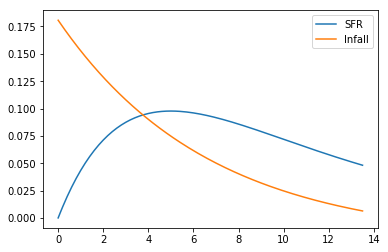

In [7]:
# But the infall can also be prescribed here we use the exponential infall:

basic_infall = INFALL(np.copy(basic_sfr.t),np.copy(basic_sfr.sfr))
getattr(basic_infall, 'exponential')((10,-0.15,0.,-1.,0.9))


# And compare it to the SFR

print(sum(basic_infall.sfr)*basic_sfr.dt)
print(sum(basic_infall.infall)*basic_sfr.dt)
plt.plot(basic_infall.t,basic_infall.sfr, label = 'SFR')
plt.plot(basic_infall.t,basic_infall.infall, label = 'Infall')
plt.legend()

## stellar initial mass function (IMF)
defines the distribution of stellar masses formed in a starburst.

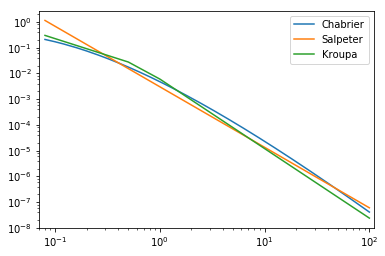

In [8]:
# We initialise the IMF class and plot it for different IMFs

from Chempy.imf import IMF
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, a.imf_type_name)((a.chabrier_para1,a.chabrier_para2,a.chabrier_para3,a.high_mass_slope))
plt.plot(basic_imf.x,basic_imf.dn, label ='Chabrier')
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, 'salpeter')((2.35))
plt.plot(basic_imf.x,basic_imf.dn, label = 'Salpeter')
basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, 'normed_3slope')((-1.3,-2.2,-2.7,0.5,1.0))
plt.plot(basic_imf.x,basic_imf.dn, label = 'Kroupa')
plt.yscale('log')
plt.xscale('log')
plt.xlim((0.07,110))
plt.legend()

### Mass range of exploding CC-SNe
The Kroupa IMF only has 8% of stars exploding as CC-SNe whereas Salpeter has 12%.


In [9]:
# We calculate the Kroupa IMF mass fractions

print(basic_imf.imf_mass_fraction(8.,100.))
print(basic_imf.imf_mass_fraction(1.,8.))
print(basic_imf.imf_mass_fraction(0.08,1.))

0.0826531531475
0.325021531915
0.59232293366


In [10]:
# And compare the mass fraction exploding as CC-SN to the Salpeter IMF

basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
getattr(basic_imf, 'salpeter')((2.35))
print(basic_imf.imf_mass_fraction(8.,100.))

0.12145269368


IMF sampling
---------------
The IMF can also be realized *stochastically*. Albeit each reaslization is new and it takes more time than the analytic version.

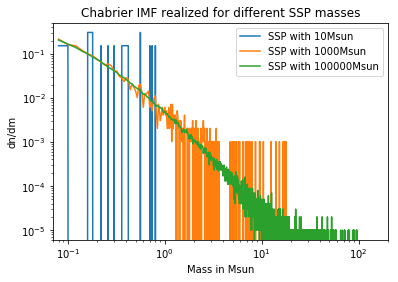

In [11]:
# We sample the Chabrier IMF for 3 different masses:

for item in [1e1,1e3,1e5]:
    basic_imf = IMF(a.mmin,a.mmax,a.mass_steps)
    getattr(basic_imf, a.imf_type_name)((a.chabrier_para1,a.chabrier_para2,a.chabrier_para3,a.high_mass_slope))
    basic_imf.stochastic_sampling(item)
    plt.plot(basic_imf.x,basic_imf.dn, label ='SSP with %dMsun' %(item))
plt.title('Chabrier IMF realized for different SSP masses')
plt.yscale('log')
plt.xscale('log')
plt.xlim((0.07,200))
plt.ylabel('dn/dm')
plt.xlabel('Mass in Msun')
plt.legend()

## Stellar lifetimes
in order to calculate when a star is dying and returns its newly produced elements into the ISM. The lifetimes are to zeroth order *mass* dependent and to first order *metallicity* dependent

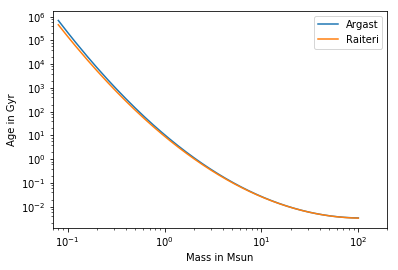

In [12]:
# Here we show the difference of Lifetime calculations

from Chempy.weighted_yield import lifetime_Argast, lifetime_Raiteri
metallicity = 0.015
plt.plot(basic_imf.x,lifetime_Argast(basic_imf.x,metallicity), label = 'Argast')
plt.plot(basic_imf.x,lifetime_Raiteri(basic_imf.x,metallicity), label = 'Raiteri')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Age in Gyr')
plt.xlabel('Mass in Msun')
plt.xlim((0.07,200))
plt.legend()

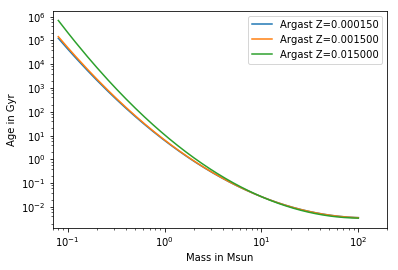

In [13]:
# And here the difference of the lifetimes with metallicity

for metallicity in [0.00015,0.0015,0.015]:
    plt.plot(basic_imf.x,lifetime_Argast(basic_imf.x,metallicity), label = 'Argast Z=%f' %(metallicity))
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Age in Gyr')
plt.xlabel('Mass in Msun')
plt.xlim((0.07,200))
plt.legend()